# Linear Tree

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from lineartree import LinearTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from joblib import dump
from sklearn.tree import plot_tree
import numpy as np
from scipy.spatial.distance import euclidean

In [2]:
import sys
sys.path.append('F:\\Users\\Manuel García Plaza\\Desktop\\TFG\\')

In [3]:
from notebooks.utils.classification_metrics import classification

In [2]:
train =  pd.read_parquet('../../../data/model_input/train_sets/car_insurance.parquet')
validation =  pd.read_parquet('../../../data/model_input/validation_sets/car_insurance.parquet')

In [3]:
y_train = train.OUTCOME
X_train = train.drop(columns=['OUTCOME'])

In [4]:
y_validation = validation.OUTCOME
X_validation = validation.drop(columns=['OUTCOME'])

In [5]:
scaler = StandardScaler().fit(X_train)

In [6]:
X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

In [14]:
max_depth = [1, 3, 5, 7, 10, 12, 15, 17, 20]
base_est = [LogisticRegression(penalty=None), LogisticRegression(), LogisticRegression(penalty='l1', solver='liblinear'), 
                    LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.25, max_iter=5000), 
                    LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=5000),
                    LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.75, max_iter=5000)]

In [15]:
models_list = []
names_list = []
for i in max_depth:
    for est in base_est:
        models_list.append(LinearTreeClassifier(base_estimator=est, max_depth=i))
        if est.penalty == 'elasticnet':
            names_list.append('LT_'+str(i)+'_en_'+str(est.l1_ratio))
        elif est.penalty == None:
            names_list.append('LT_'+str(i))
        else:
            names_list.append('LT_'+str(i)+'_'+str(est.penalty))

In [24]:
metrics = classification(models_list, names_list, '../../../data/model_output/metrics/car_insurance/linear_tree.csv', X_train_scaled, y_train, X_validation_scaled, y_validation, metrics={})
metrics

,Run_Time,Train_AUC,Validation_AUC,delta%
LT_1,3.657650,0.916474,0.911411,-0.552387
LT_1_l2,4.421095,0.916487,0.911440,-0.550676
LT_1_l1,24.123223,0.916479,0.911432,-0.550765
LT_1_en_0.25,77.452528,0.916485,0.911417,-0.552881
LT_1_en_0.5,64.529822,0.916481,0.911420,-0.552293
LT_1_en_0.75,49.992358,0.916483,0.911422,-0.552270
LT_3,5.465152,0.919108,0.908713,-1.130950
LT_3_l2,6.983368,0.919304,0.908201,-1.207784
LT_3_l1,34.533000,0.919371,0.908176,-1.217705
LT_3_en_0.25,114.923600,0.919304,0.908145,-1.213772


In [26]:
metrics.sort_values(by='Validation_AUC', ascending=False)

,Run_Time,Train_AUC,Validation_AUC,delta%
LT_1_l2,4.421095,0.916487,0.911440,-0.550676
LT_1_l1,24.123223,0.916479,0.911432,-0.550765
LT_1_en_0.75,49.992358,0.916483,0.911422,-0.552270
LT_1_en_0.5,64.529822,0.916481,0.911420,-0.552293
LT_1_en_0.25,77.452528,0.916485,0.911417,-0.552881
LT_1,3.657650,0.916474,0.911411,-0.552387
LT_3,5.465152,0.919108,0.908713,-1.130950
LT_5_en_0.25,121.339760,0.920764,0.908233,-1.360881
LT_20_en_0.25,119.554711,0.920764,0.908233,-1.360861
LT_17_en_0.25,119.739605,0.920764,0.908233,-1.360861


We choose **LT_1_l2** due to its low run time, low delta and high AUC in validation

In [7]:
test =  pd.read_parquet('../../../data/model_input/test_sets/car_insurance.parquet')

In [8]:
y_test = test.OUTCOME
X_test = test.drop(columns=['OUTCOME'])

In [9]:
retrain = pd.concat([train, validation])

In [10]:
y_retrain = retrain.OUTCOME
X_retrain = retrain.drop(columns=['OUTCOME'])

In [11]:
scaler_retrain = StandardScaler().fit(X_retrain, y_retrain)

In [12]:
X_retrain_scaled = scaler_retrain.transform(X_retrain)
X_test_scaled = scaler_retrain.transform(X_test)

In [44]:
model = LinearTreeClassifier(base_estimator=LogisticRegression(), max_depth=1).fit(X_retrain_scaled, y_retrain)

In [45]:
test_pred = model.predict_proba(X_test_scaled)[:, 1]
auc = roc_auc_score(y_test, test_pred)
print('Test AUC:', round(auc, 4))

Test AUC: 0.9199


In [46]:
dump(model, '../../../data/model_output/models/car_insurance/best_linear_tree.joblib')

['best_linear_tree.joblib']

In [47]:
with open('../../../data/model_output/metrics/car_insurance/final_AUC.txt', 'a') as f:
    f.write('\nLT, '+ str(auc))

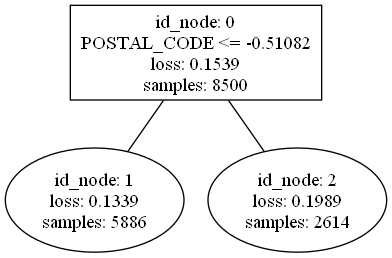

In [48]:
model.plot_model(feature_names=X_retrain.columns)

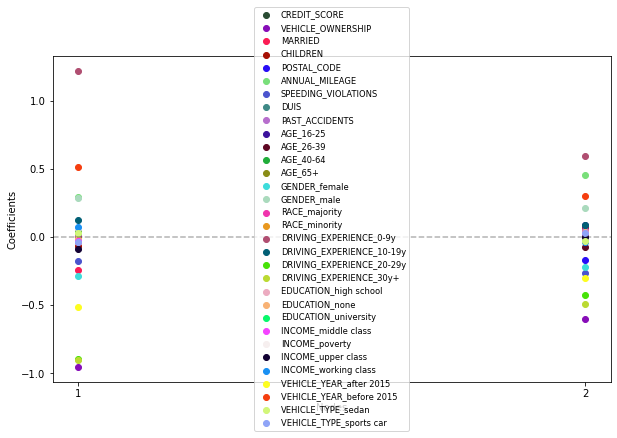

In [65]:
leaves = model.summary(only_leaves=True)
x_values = list(leaves.keys())
coefs_values = []

for i in range(X_retrain.shape[1]):
    coef = []
    for el in leaves.values():
        coef.append([el['models'].coef_[0][i]])
    coefs_values.append(coef)

    
num_colors = len(X_retrain.columns)
temp_colors = set()
colors = []

while len(colors) < num_colors:
    new_color = np.random.rand(3, )
    color_hashable = tuple(new_color)
    if color_hashable not in temp_colors:
        dist = [euclidean(new_color, c) for c in colors]
        if min(dist, default=np.inf) > 0.3:
            temp_colors.add(color_hashable)
            colors.append(new_color)
    
    
plt.figure(figsize=(10,6))
for i in range(len(coefs_values)):
    plt.scatter(list(x_values), coefs_values[i], label=X_retrain.columns[i], color=colors[i])
plt.axhline(0, c='black', linestyle='--', alpha=0.3)
plt.ylabel('Coefficients')
plt.xlabel('Nodes')
plt.legend(loc='center', fontsize='small', bbox_to_anchor=(0.5, 0.5))
plt.xticks(list(x_values))
plt.show()

In [13]:
from joblib import load
load_mod = load('../../../data/model_output/models/car_insurance/best_linear_tree.joblib')

In [14]:
train_pred = load_mod.predict_proba(X_retrain_scaled)[:, 1]
auc_train = roc_auc_score(y_retrain, train_pred)
test_pred = load_mod.predict_proba(X_test_scaled)[:, 1]
auc_test = roc_auc_score(y_test, test_pred)

In [15]:
import time 
time1 = time.time()
LinearTreeClassifier(base_estimator=LogisticRegression(), max_depth=1).fit(X_retrain_scaled, y_retrain)
time2 = time.time() - time1 

In [16]:
with open('../../../data/model_output/metrics/car_insurance/final_metrics.txt', 'a') as f:
     f.write(f'\nLT; {time2}; {auc_train}; {auc_test}')